## Mounting Google Drive

In [0]:
from google.colab import drive
drive.mount('/content/drive')

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3aietf%3awg%3aoauth%3a2.0%3aoob&response_type=code&scope=email%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdocs.test%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive.photos.readonly%20https%3a%2f%2fwww.googleapis.com%2fauth%2fpeopleapi.readonly

Enter your authorization code:
··········
Mounted at /content/drive


## Importing Required Files

In [0]:
import os
import zipfile
import numpy as np
import tensorflow as tf
from tensorflow import keras
import matplotlib.pyplot as plt

## Knowing your Data

In [0]:

print("Knowing our train data")
train_0_dir = os.path.join('/content/drive/My Drive/Projects/Neural_Network_Competition_Project/Data Split/TrainData/0')
train_0_names = os.listdir(train_0_dir)
print("Class 0 has: ", len(train_0_names) , " images." )
print(train_0_names[:10])

train_1_dir = os.path.join('/content/drive/My Drive/Projects/Neural_Network_Competition_Project/Data Split/TrainData/1')
train_1_names = os.listdir(train_1_dir)
print("Class 1 has: ", len(train_1_names) , " images." )
print(train_1_names[:10])

train_2_dir = os.path.join('/content/drive/My Drive/Projects/Neural_Network_Competition_Project/Data Split/TrainData/2')
train_2_names = os.listdir(train_2_dir)
print("Class 2 has: ", len(train_2_names) , " images." )
print(train_2_names[:10])

train_3_dir = os.path.join('/content/drive/My Drive/Projects/Neural_Network_Competition_Project/Data Split/TrainData/3')
train_3_names = os.listdir(train_3_dir)
print("Class 3 has: ", len(train_3_names) , " images." )
print(train_3_names[:10])


train_4_dir = os.path.join('/content/drive/My Drive/Projects/Neural_Network_Competition_Project/Data Split/TrainData/4')
train_4_names = os.listdir(train_4_dir)
print("Class 4 has: ", len(train_4_names) , " images." )
print(train_4_names[:10])

Knowing our train data
Class 0 has:  366  images.
['000006.jpg', '000016.jpg', '000104.jpg', '000253.jpg', '000265.jpg', '000353.jpg', '000387.jpg', '000488.jpg', '000747.jpg', '000821.jpg']
Class 1 has:  139  images.
['000401.jpg', '000470.jpg', '000635.jpg', '000704.jpg', '001064.jpg', '001279.jpg', '001405.jpg', '001411.jpg', '001578.jpg', '001598.jpg']
Class 2 has:  98  images.
['000300.jpg', '000306.jpg', '000698.jpg', '000758.jpg', '000778.jpg', '001163.jpg', '001197.jpg', '001213.jpg', '002702.jpg', '003006.jpg']
Class 3 has:  98  images.
['000122.jpg', '000424.jpg', '000608.jpg', '000710.jpg', '000738.jpg', '001027.jpg', '001118.jpg', '001140.jpg', '001219.jpg', '001238.jpg']
Class 4 has:  68  images.
['000097.jpg', '000237.jpg', '000555.jpg', '000770.jpg', '000934.jpg', '001636.jpg', '001659.jpg', '001726.jpg', '002185.jpg', '002191.jpg']


## Write a Tensorflow Model

In [0]:
import tensorflow as tf


class myCallback(# your code
    tf.keras.callbacks.Callback):
    def on_epoch_end(self, epoch, logs={}):
      if(logs.get('acc')>0.99):
        print("\nReached 99% accuracy so cancelling training!")
        self.model.stop_training = True
    
callbacks = myCallback()
#image size = (640,480)
# Model accuracy between 80-85%
# model = tf.keras.models.Sequential([
#     # Your Code Here
#     tf.keras.layers.Conv2D(8, (5,5), activation='relu', input_shape=(640,480,3)),
#     tf.keras.layers.MaxPooling2D(3,3),
#     #tf.keras.layers.Dropout(rate=0.2),
#     tf.keras.layers.Conv2D(16,(3,3), activation='relu'),
#     tf.keras.layers.MaxPooling2D(2,2),
#     tf.keras.layers.Conv2D(32, (2,2), activation ='relu'),
#     tf.keras.layers.MaxPooling2D(2,2),
#     #tf.keras.layers.Dropout(rate=0.1),
#     tf.keras.layers.Flatten(),
#     tf.keras.layers.Dense(256, activation ='relu'),
#     tf.keras.layers.Dense(512, activation = 'relu'),
#     tf.keras.layers.Dense(1024, activation = 'relu'),
#     tf.keras.layers.Dense(5 , activation = tf.nn.softmax)
# ])
# model.summary()  

model = tf.keras.models.Sequential([
    # Your Code Here
    tf.keras.layers.Conv2D(32, (5,5), activation='relu', input_shape=(640,480,3)),
    tf.keras.layers.MaxPooling2D(3,3),
    tf.keras.layers.Conv2D(64,(3,3), activation='relu'),
    tf.keras.layers.MaxPooling2D(3,3),
    tf.keras.layers.Conv2D(128, (3,3), activation ='relu'),
    tf.keras.layers.MaxPooling2D(2,2),
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(512, activation = 'relu'),
    tf.keras.layers.Dense(256, activation = 'relu'),
    tf.keras.layers.Dense(128, activation = 'relu'),
    tf.keras.layers.Dense(5 , activation = tf.nn.softmax)
])



## Model Summary

In [0]:
model.summary() 

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_3 (Conv2D)            (None, 636, 476, 32)      2432      
_________________________________________________________________
max_pooling2d_3 (MaxPooling2 (None, 212, 158, 32)      0         
_________________________________________________________________
conv2d_4 (Conv2D)            (None, 210, 156, 64)      18496     
_________________________________________________________________
max_pooling2d_4 (MaxPooling2 (None, 70, 52, 64)        0         
_________________________________________________________________
conv2d_5 (Conv2D)            (None, 68, 50, 128)       73856     
_________________________________________________________________
max_pooling2d_5 (MaxPooling2 (None, 34, 25, 128)       0         
_________________________________________________________________
flatten_1 (Flatten)          (None, 108800)           

## Create Train data generator and Fit data generator

In [0]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator

train_datagen = ImageDataGenerator(rescale=1.0/255)

train_generator = train_datagen.flow_from_directory(
directory =  r"/content/drive/My Drive/Projects/Neural_Network_Competition_Project/Data Split/TrainData",
target_size=(640,480),
batch_size = 32,
class_mode = "sparse" )

validation_generator = train_datagen.flow_from_directory(
directory =  r"/content/drive/My Drive/Projects/Neural_Network_Competition_Project/Data Split/ValData",
target_size=(640,480),
batch_size = 32,
class_mode = "sparse" )

Found 769 images belonging to 5 classes.
Found 256 images belonging to 5 classes.


## Fit Model

In [0]:
model.compile(loss='sparse_categorical_crossentropy', optimizer = 'adam',metrics=['acc'])

history = model.fit_generator(train_generator, epochs = 25, validation_data = validation_generator, verbose = 2, callbacks = [callbacks])

Epoch 1/25
Epoch 1/25
25/25 - 17s - loss: 1.6829 - acc: 0.4629 - val_loss: 1.4017 - val_acc: 0.4766
Epoch 2/25
Epoch 1/25
25/25 - 14s - loss: 1.4301 - acc: 0.4551 - val_loss: 1.5160 - val_acc: 0.4766
Epoch 3/25
Epoch 1/25
25/25 - 14s - loss: 1.4218 - acc: 0.4759 - val_loss: 1.3967 - val_acc: 0.4766
Epoch 4/25
Epoch 1/25
25/25 - 14s - loss: 1.3631 - acc: 0.4759 - val_loss: 1.2992 - val_acc: 0.4766
Epoch 5/25
Epoch 1/25
25/25 - 14s - loss: 1.4206 - acc: 0.4759 - val_loss: 1.3793 - val_acc: 0.4766
Epoch 6/25
Epoch 1/25
25/25 - 14s - loss: 1.3068 - acc: 0.4603 - val_loss: 1.2993 - val_acc: 0.4766
Epoch 7/25
Epoch 1/25
25/25 - 14s - loss: 1.2387 - acc: 0.5410 - val_loss: 1.4109 - val_acc: 0.4766
Epoch 8/25
Epoch 1/25
25/25 - 14s - loss: 1.2390 - acc: 0.5215 - val_loss: 1.1062 - val_acc: 0.5547
Epoch 9/25
Epoch 1/25
25/25 - 14s - loss: 1.1215 - acc: 0.5709 - val_loss: 1.0806 - val_acc: 0.5703
Epoch 10/25
Epoch 1/25
25/25 - 14s - loss: 0.9949 - acc: 0.6216 - val_loss: 1.1277 - val_acc: 0.5977

## Save the model

In [0]:

model.save('/content/drive/My Drive/Projects/Neural_Network_Competition_Project/Data Split/model7.h5')
with open('/content/drive/My Drive/Projects/Neural_Network_Competition_Project/Data Split/model7_architecture.json', 'w') as f:
    f.write(model.to_json())
#model2 val accuracy = 79.3
#model3 val accuracy = 85.94

## Make a test data Genereator

In [0]:
test_dir = os.path.join('/content/drive/My Drive/Projects/Neural_Network_Competition_Project/Data Split/Test/0')
test_names = os.listdir(test_dir)
print("Test data has: ", len(test_names) , " images." )
print(test_names[:10])

Test data has:  300  images.
['21051.jpg', '21316.jpg', '20263.jpg', '20739.jpg', '24352.jpg', '22387.jpg', '21851.jpg', '21348.jpg', '22320.jpg', '22482.jpg']


In [0]:

from tensorflow.keras.preprocessing.image import ImageDataGenerator
test_datagen = ImageDataGenerator(rescale=1./255)

test_generator = test_datagen.flow_from_directory(
        directory = r"/content/drive/My Drive/Projects/Neural_Network_Competition_Project/Data Split/Test",
        target_size=(640, 480),
        color_mode="rgb",
        shuffle = False,
        class_mode='sparse',
        batch_size=1)

filenames = test_generator.filenames
print(filenames)

Found 300 images belonging to 1 classes.
['0/20018.jpg', '0/20031.jpg', '0/20036.jpg', '0/20069.jpg', '0/20110.jpg', '0/20140.jpg', '0/20172.jpg', '0/20173.jpg', '0/20174.jpg', '0/20244.jpg', '0/20253.jpg', '0/20263.jpg', '0/20297.jpg', '0/20323.jpg', '0/20351.jpg', '0/20446.jpg', '0/20510.jpg', '0/20535.jpg', '0/20584.jpg', '0/20597.jpg', '0/20619.jpg', '0/20639.jpg', '0/20693.jpg', '0/20718.jpg', '0/20720.jpg', '0/20732.jpg', '0/20739.jpg', '0/20783.jpg', '0/20794.jpg', '0/20795.jpg', '0/20801.jpg', '0/20810.jpg', '0/20833.jpg', '0/20835.jpg', '0/20836.jpg', '0/20848.jpg', '0/20849.jpg', '0/20861.jpg', '0/20877.jpg', '0/20881.jpg', '0/20927.jpg', '0/20941.jpg', '0/20963.jpg', '0/20980.jpg', '0/20999.jpg', '0/21027.jpg', '0/21039.jpg', '0/21047.jpg', '0/21048.jpg', '0/21051.jpg', '0/21095.jpg', '0/21104.jpg', '0/21128.jpg', '0/21136.jpg', '0/21153.jpg', '0/21176.jpg', '0/21220.jpg', '0/21240.jpg', '0/21267.jpg', '0/21310.jpg', '0/21316.jpg', '0/21343.jpg', '0/21348.jpg', '0/21366.jpg'

## Loading Model

In [0]:
import numpy as np
# #load model
# with open('/content/drive/My Drive/Projects/Neural_Network_Competition_Project/Data Split/model3_architecture.json', 'r') as f:
#     new_model = model_from_json(f.read())

# Load weights into the new model

#model6: 84.3 Percent Accuracy
new_model = keras.models.load_model('/content/drive/My Drive/Projects/Neural_Network_Competition_Project/Data Split/model2.h5')
print("Model loaded successfully")


Instructions for updating:
Call initializer instance with the dtype argument instead of passing it to the constructor
Instructions for updating:
Call initializer instance with the dtype argument instead of passing it to the constructor
Model loaded successfully


## Predict the model and print classes

In [0]:
predictions = new_model.predict_generator(test_generator) 
print(predictions)    
predictions = np.argmax(predictions, axis=-1) #multiple categories
label = (test_generator.class_indices)
print(predictions)

[[3.5628499e-04 5.0194591e-02 4.0263144e-04 6.0322829e-02 8.8872373e-01]
 [9.9982160e-01 3.2893855e-05 1.4339860e-04 2.1436870e-06 3.1352972e-11]
 [9.9672514e-01 4.5181546e-04 2.8123024e-03 1.0737929e-05 1.5014341e-10]
 ...
 [4.5880903e-02 9.4292766e-01 1.1187637e-02 3.8692701e-06 1.0260531e-09]
 [8.4333444e-01 7.6300912e-02 5.2993656e-03 7.4453712e-02 6.1153312e-04]
 [9.9992621e-01 1.4605188e-05 5.8096230e-05 1.0316365e-06 9.4332615e-12]]
[4 0 0 3 0 1 3 0 2 4 1 0 0 1 0 1 0 1 0 0 0 0 0 0 3 2 0 1 0 0 4 1 0 0 0 3 1
 1 0 0 1 1 0 0 1 2 0 0 0 0 2 0 2 1 0 2 0 0 0 0 0 4 0 0 0 3 0 4 0 2 0 2 0 2
 0 1 0 3 0 1 1 0 1 0 3 3 4 0 0 1 1 0 2 1 0 0 0 1 1 4 1 0 4 0 0 1 0 0 0 0 3
 0 1 0 1 3 0 0 1 0 1 1 0 2 0 1 0 1 0 0 2 0 0 0 0 0 3 0 3 4 1 0 0 3 1 0 3 0
 0 0 1 1 1 0 3 0 3 0 1 0 0 0 0 0 1 0 1 3 0 0 1 1 4 1 3 0 0 0 1 0 1 0 1 3 0
 0 0 1 1 1 0 0 1 2 0 1 0 0 0 0 0 0 1 2 4 0 0 1 0 1 0 2 1 0 0 3 1 0 1 0 2 3
 1 4 1 1 4 0 0 3 0 1 2 1 3 0 1 1 0 0 2 1 1 0 0 0 1 3 3 2 3 1 4 1 1 0 0 0 0
 0 1 1 0 0 0 1 2 0 0 0 2 0 0 2 

## Understanding Class Prediction Labels

In [0]:
image_prediction_dict = {}
for x, y in zip(test_names,predictions):
  image_prediction_dict[x] = y
  
class0 = [k for k,v in image_prediction_dict.items() if v == 0]
class1 = [k for k,v in image_prediction_dict.items() if v == 1]
class2 = [k for k,v in image_prediction_dict.items() if v == 2]
class3 = [k for k,v in image_prediction_dict.items() if v == 3]
class4 = [k for k,v in image_prediction_dict.items() if v == 4]
print("\nClass 0 images: ", len(class0), "\nClass 1 images: ", len(class1), "\nClass 2 images: ", len(class2), "\nClass 3 images: " ,len(class3), "\nClass 4 images: ", len(class4))
print(class4)


Class 0 images:  153 
Class 1 images:  78 
Class 2 images:  23 
Class 3 images:  30 
Class 4 images:  16
['21051.jpg', '22482.jpg', '20619.jpg', '25668.jpg', '25447.jpg', '20927.jpg', '24382.jpg', '25367.jpg', '23278.jpg', '22438.jpg', '23576.jpg', '20018.jpg', '23195.jpg', '23304.jpg', '23780.jpg', '24233.jpg']


In [0]:
class4.sort()
print(class4)
print(image_prediction_dict['20172.jpg'])

['20018.jpg', '20619.jpg', '20927.jpg', '21051.jpg', '22438.jpg', '22482.jpg', '23195.jpg', '23278.jpg', '23304.jpg', '23576.jpg', '23780.jpg', '24233.jpg', '24382.jpg', '25367.jpg', '25447.jpg', '25668.jpg']
0


## Converting to one hot encoding

In [0]:
from numpy import array
from numpy import argmax
from keras.utils import to_categorical
# define example
data = predictions
data = array(data)
print(data)
# one hot encode
encoded = to_categorical(data)
int_convert = []
for x in encoded:
  int_convert.append([int(k) for k in x])
print(int_convert)

import csv
csvfile = open('/content/drive/My Drive/Projects/Neural_Network_Competition_Project/Data Split/predictions.csv','w', newline='')
obj1 = csv.writer(csvfile)
obj1.writerows(int_convert)
csvfile.close()
print("File Created")

[4 0 0 3 0 1 3 0 2 4 1 0 0 1 0 1 0 1 0 0 0 0 0 0 3 2 0 1 0 0 4 1 0 0 0 3 1
 1 0 0 1 1 0 0 1 2 0 0 0 0 2 0 2 1 0 2 0 0 0 0 0 4 0 0 0 3 0 4 0 2 0 2 0 2
 0 1 0 3 0 1 1 0 1 0 3 3 4 0 0 1 1 0 2 1 0 0 0 1 1 4 1 0 4 0 0 1 0 0 0 0 3
 0 1 0 1 3 0 0 1 0 1 1 0 2 0 1 0 1 0 0 2 0 0 0 0 0 3 0 3 4 1 0 0 3 1 0 3 0
 0 0 1 1 1 0 3 0 3 0 1 0 0 0 0 0 1 0 1 3 0 0 1 1 4 1 3 0 0 0 1 0 1 0 1 3 0
 0 0 1 1 1 0 0 1 2 0 1 0 0 0 0 0 0 1 2 4 0 0 1 0 1 0 2 1 0 0 3 1 0 1 0 2 3
 1 4 1 1 4 0 0 3 0 1 2 1 3 0 1 1 0 0 2 1 1 0 0 0 1 3 3 2 3 1 4 1 1 0 0 0 0
 0 1 1 0 0 0 1 2 0 0 0 2 0 0 2 1 3 0 4 1 1 1 0 3 4 1 0 0 0 0 0 3 3 2 0 0 0
 0 1 0 0]
[[0, 0, 0, 0, 1], [1, 0, 0, 0, 0], [1, 0, 0, 0, 0], [0, 0, 0, 1, 0], [1, 0, 0, 0, 0], [0, 1, 0, 0, 0], [0, 0, 0, 1, 0], [1, 0, 0, 0, 0], [0, 0, 1, 0, 0], [0, 0, 0, 0, 1], [0, 1, 0, 0, 0], [1, 0, 0, 0, 0], [1, 0, 0, 0, 0], [0, 1, 0, 0, 0], [1, 0, 0, 0, 0], [0, 1, 0, 0, 0], [1, 0, 0, 0, 0], [0, 1, 0, 0, 0], [1, 0, 0, 0, 0], [1, 0, 0, 0, 0], [1, 0, 0, 0, 0], [1, 0, 0, 0, 0], [1, 0, 0, 0, 0]

## Predicting with a different model

In [0]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator
test_datagen = ImageDataGenerator(rescale=1./255)

test_generator = test_datagen.flow_from_directory(
        directory = r"/content/drive/My Drive/Projects/Neural_Network_Competition_Project/Data Split/ValData",
        target_size=(640, 480),
        color_mode="rgb",
        shuffle = False,
        class_mode='sparse',
        batch_size=1)

filenames = test_generator.filenames
print(filenames)
new_model = keras.models.load_model('/content/drive/My Drive/Projects/Neural_Network_Competition_Project/Data Split/model2.h5')
print("Model loaded successfully")

predictions = new_model.predict_generator(test_generator) 
print(predictions)    
predictions = np.argmax(predictions, axis=-1) #multiple categories

print(predictions)

Found 256 images belonging to 5 classes.
['0/000032.jpg', '0/000333.jpg', '0/000675.jpg', '0/000917.jpg', '0/000981.jpg', '0/001150.jpg', '0/001326.jpg', '0/001518.jpg', '0/001692.jpg', '0/001775.jpg', '0/001864.jpg', '0/002318.jpg', '0/002441.jpg', '0/002764.jpg', '0/002914.jpg', '0/003036.jpg', '0/003149.jpg', '0/003315.jpg', '0/003568.jpg', '0/003741.jpg', '0/003888.jpg', '0/004039.jpg', '0/004288.jpg', '0/004446.jpg', '0/004676.jpg', '0/004863.jpg', '0/005025.jpg', '0/005272.jpg', '0/005517.jpg', '0/005651.jpg', '0/005822.jpg', '0/005904.jpg', '0/006001.jpg', '0/006213.jpg', '0/006316.jpg', '0/006550.jpg', '0/006885.jpg', '0/007023.jpg', '0/007273.jpg', '0/007498.jpg', '0/007654.jpg', '0/007705.jpg', '0/007888.jpg', '0/008089.jpg', '0/008287.jpg', '0/008505.jpg', '0/008612.jpg', '0/008673.jpg', '0/008705.jpg', '0/008882.jpg', '0/008990.jpg', '0/009110.jpg', '0/009296.jpg', '0/009445.jpg', '0/009741.jpg', '0/009848.jpg', '0/009963.jpg', '0/010100.jpg', '0/010312.jpg', '0/010549.jpg'

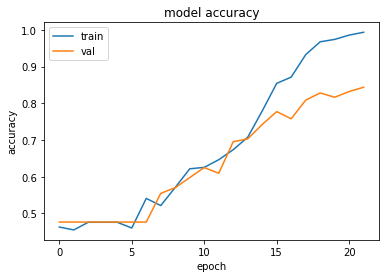

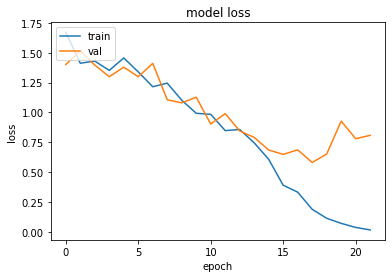

In [0]:
# summarize history for accuracy
plt.plot(history.history['acc'])
plt.plot(history.history['val_acc'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'val'], loc='upper left')
plt.savefig("Accuracy_curves.png")
plt.show()

# summarize history for loss
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'val'], loc='upper left')
plt.savefig("Loss_curves.png")
plt.show()

## Creating graphs for Ground Truth vs Prediction

In [0]:
#No of files and classes
x = []
#class 0 = 122
for i in range(0,122):
  x.append(0)
#class 1 = 46
for i in range(0,46):
  x.append(1)
#class 2 = 32
for i in range(0,32):
  x.append(2)
#class 3 = 33
for i in range(0,33):
  x.append(3)
#class 4 = 23
for i in range(0,23):
  x.append(4)
print(len(x))
labels = x

256


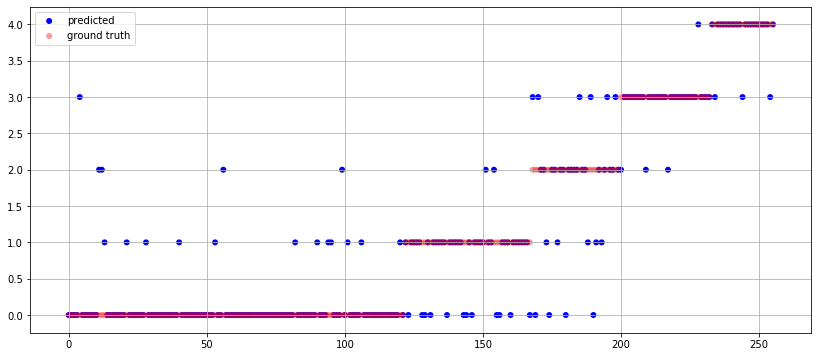

File written


In [0]:
x = []
for i in range(0,256):
  x.append(i)
import matplotlib.pyplot as plt

fig, ax = plt.subplots()
fig.set_size_inches(14,6)
ax.scatter(x, predictions, color='blue', edgecolors='none', label = 'predicted')
ax.scatter(x, labels, color='red', alpha = 0.4,edgecolors='none', label = 'ground truth')

ax.legend()
ax.grid(True)
plt.savefig('/content/drive/My Drive/Projects/Neural_Network_Competition_Project/Data Split/prediction_vs_groundtruth.jpg')
plt.show()

names = ['jjjagtap', 'ptiwari' , 'akwatra']
import csv
csvfile = open('/content/drive/My Drive/Projects/Neural_Network_Competition_Project/Data Split/names.csv','w', newline='')
obj1 = csv.writer(csvfile)
obj1.writerows(names)
csvfile.close()
print('File written')